 ## Complete example autoencoders from blog.keras.io
 
The material on this notebook is largely inspired from https://blog.keras.io/building-autoencoders-in-keras.html

1. Undercomplete autoencoder
    a. Mean square loss function
    b. Cross entropy loss function
2. Sparse autoencoding
3. Add hidden layers


In [1]:
## Load data (MNIST digits) and flatten images
import tensorflow

from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()  # Drop off labels (unsupervised task)

x_train = x_train.astype('float32') / 255.     # normalize to 0-1
x_test  = x_test.astype('float32')  / 255.     # normalize to 0-1
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # reshape to n x (28 x 28)
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))     # reshape to n x (28 x 28)
print (x_train.shape)
print (x_test.shape)



(60000, 784)
(10000, 784)


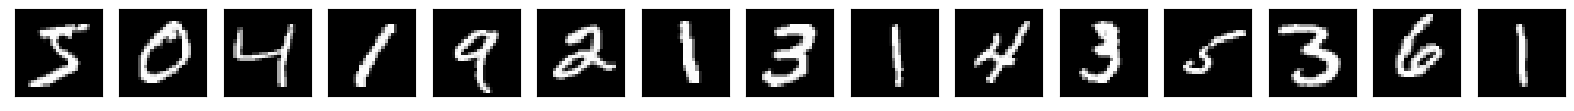

In [2]:
# Display train images (need to be unflatten)

n = 15  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### 1. Undercomplete autoencoder 

architecture: 
- 1 hidden layer with 32 units ($\ll$ 784 pixels = 28 x 28)
- activation functions are relu and sigmoid
- optimizer is adadelta (adaptative stochastic gradient descent)
- loss function is binary_crossentropy 


In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define network's architecture

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,), name ="input")              # input placeholder
encoded = Dense(encoding_dim, activation='relu', name = "encode")(input_img) # encoded representation of the input
decoded = Dense(784, activation='sigmoid', name = "decode")(encoded)         # lossy reconstruction of the input

autoencoder = Model(input_img, decoded) # maps an input to its reconstruction

encoder = Model(input_img, encoded)          # maps an input to its encoded representation 
encoded_input = Input(shape=(encoding_dim,)) # create a placeholder for an encoded (32-dimensional) input
decoder_layer = autoencoder.layers[-1]       # retrieve the last layer of the autoencoder model
decoder = Model(encoded_input, decoder_layer(encoded_input)) # create the decoder model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  

Metal device set to: Apple M1


2023-01-12 14:37:17.102111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-12 14:37:17.102601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
from tensorflow.keras.callbacks import TensorBoard

history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)
                #callbacks=[TensorBoard(log_dir='./model1')])


Epoch 1/100


2023-01-12 14:37:37.780099: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-12 14:37:37.939377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 7ms/step - loss: 0.2757 - accuracy: 0.0122 - val_loss: 0.1904 - val_accuracy: 0.0105
Epoch 2/100
  1/235 [..............................] - ETA: 1s - loss: 0.1944 - accuracy: 0.0234

2023-01-12 14:37:39.957526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 6ms/step - loss: 0.1726 - accuracy: 0.0116 - val_loss: 0.1557 - val_accuracy: 0.0123
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1457 - accuracy: 0.0105 - val_loss: 0.1343 - val_accuracy: 0.0102
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1288 - accuracy: 0.0106 - val_loss: 0.1215 - val_accuracy: 0.0104
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1183 - accuracy: 0.0106 - val_loss: 0.1131 - val_accuracy: 0.0090
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1111 - accuracy: 0.0106 - val_loss: 0.1069 - val_accuracy: 0.0111
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1059 - accuracy: 0.0110 - val_loss: 0.1025 - val_accuracy: 0.0117
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1022 - accuracy: 0.0116 - val_loss: 0.0995 - val_accuracy: 0.0131
Epoch 9/100

235/235 [==============================] - 1s 6ms/step - loss: 0.0925 - accuracy: 0.0122 - val_loss: 0.0914 - val_accuracy: 0.0128
Epoch 60/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0925 - accuracy: 0.0124 - val_loss: 0.0915 - val_accuracy: 0.0130
Epoch 61/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0925 - accuracy: 0.0119 - val_loss: 0.0914 - val_accuracy: 0.0128
Epoch 62/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0924 - accuracy: 0.0125 - val_loss: 0.0914 - val_accuracy: 0.0131
Epoch 63/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0924 - accuracy: 0.0127 - val_loss: 0.0914 - val_accuracy: 0.0144
Epoch 64/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0924 - accuracy: 0.0119 - val_loss: 0.0914 - val_accuracy: 0.0133
Epoch 65/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0924 - accuracy: 0.0126 - val_loss: 0.0914 - val_accuracy: 0.0134
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


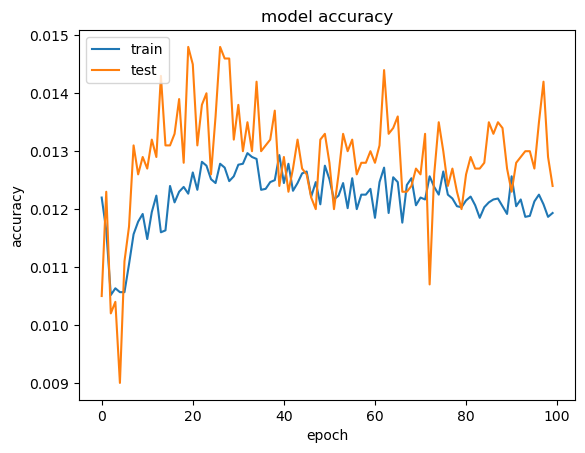

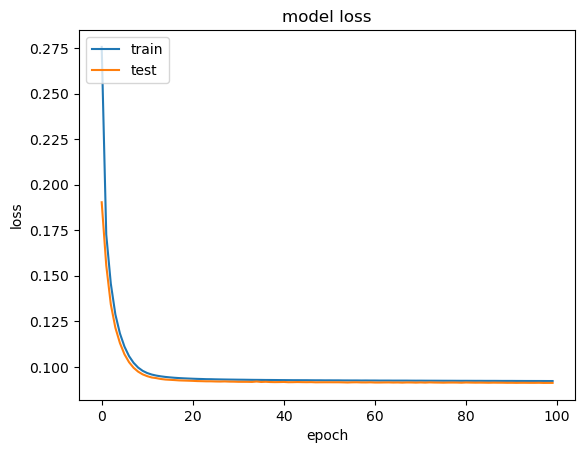

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

185/313 [================>.............] - ETA: 0s

2023-01-12 14:40:37.760337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


191/313 [=================>............] - ETA: 0s

2023-01-12 14:40:38.116054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 822us/step


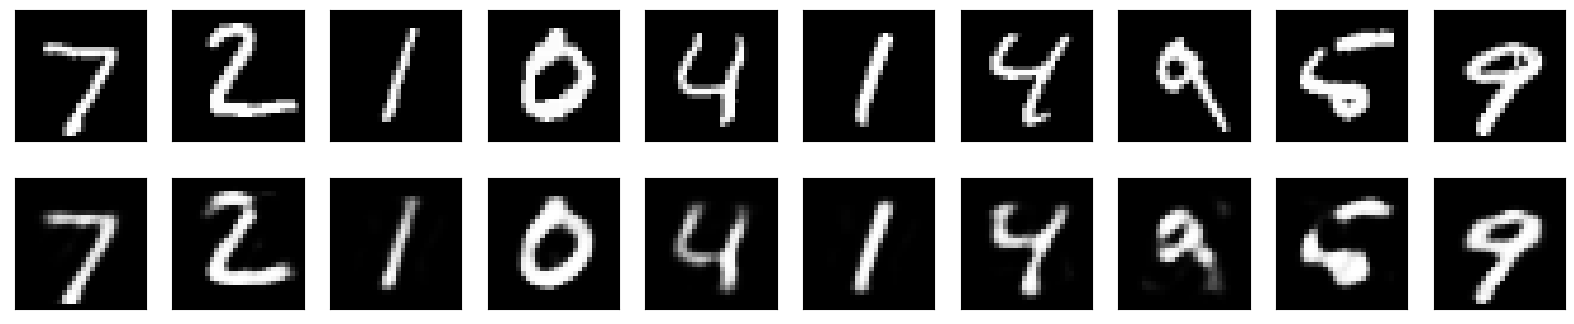

In [6]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs
               [i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 [==============================] - 0s 8ms/step


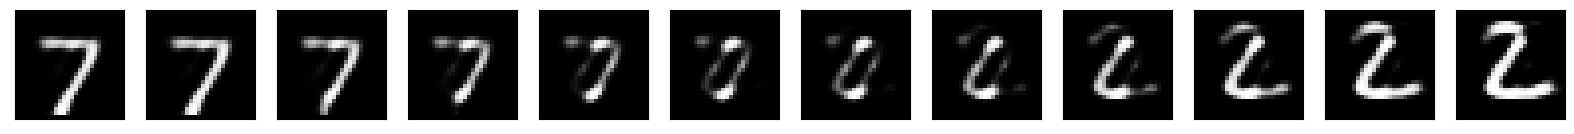

In [8]:
encoded_imgs_7 = encoder.predict(x_test[0,].reshape(1,784))
decoded_imgs_7 = decoder.predict(encoded_imgs_7)

encoded_imgs_2 = encoder.predict(x_test[1,].reshape(1,784))
decoded_imgs_2 = decoder.predict(encoded_imgs_2)

maxt = 10

plt.figure(figsize=(20, 4))
ax = plt.subplot(1, maxt+2, 1)
plt.imshow(decoded_imgs_7.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, maxt+2, maxt+2)
plt.imshow(decoded_imgs_2.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for i in range(maxt):
    encoded_av = ((maxt-i)*encoded_imgs_7 + i*encoded_imgs_2)/maxt
    decoded_av = decoder.predict(encoded_av)
    ax = plt.subplot(1, maxt+2, 2+i)
    plt.imshow(decoded_av.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [10]:
encoded_imgs_2

array([[14.817486 ,  7.6984215,  9.8160515,  2.0394366,  1.3197639,
         6.1564903,  8.837211 ,  0.8206718,  9.143299 , 10.060319 ,
         4.3359795,  6.969446 ,  8.178925 ,  8.5157995, 11.345015 ,
        10.771353 ,  5.2057233, 11.801232 , 11.737979 ,  3.8939087,
         6.630967 ,  3.1993332, 25.029673 ,  8.142599 ,  9.220619 ,
         1.5946734, 10.460758 ,  6.7940426,  8.360773 ,  2.974836 ,
         3.5544603,  6.4745145]], dtype=float32)

### 2. Sparse autoencoding


In [26]:
from tensorflow.keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)



### 3. Add hidden layers

In [27]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 9/100
235/235 [==============================] - 4s 15ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6924 - val_l